In [2117]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h3>Create dataframes from CSV files</h3>

In [2118]:
df_football = pd.read_csv("Football.csv")
df_baseball = pd.read_csv("Baseball.csv")
df_basketball = pd.read_csv("Basketball.csv")
df_hockey = pd.read_csv("Hockey.csv")

<h3>Define categorial number for each sport</h3>
I am adding categorial number for each df (instead of name of sport)
<ul>
<li>1 - Football
<li>2 - Baseball
<li>3 - Basketball
<li>4 - Hockey
</ul>

In [2119]:
df_football['cat'] = 1
df_football.drop(df_football.columns[0], inplace=True, axis=1)
df_football.to_csv("Football.csv")
df_baseball['cat'] = 2
df_baseball.drop(df_baseball.columns[0], inplace=True, axis=1)
df_baseball.to_csv("Baseball.csv")
df_basketball['cat'] = 3
df_basketball.drop(df_basketball.columns[0], inplace=True, axis=1)
df_basketball.to_csv("Basketball.csv")
df_hockey['cat'] = 4
df_hockey.drop(df_hockey.columns[0], inplace=True, axis=1)
df_hockey.to_csv("Hockey.csv")

Concatenate all dfs into one df and save to CSV file

In [2120]:
full_data = pd.concat([df_football,df_baseball,df_basketball,df_hockey], ignore_index=True, sort=False)
full_data.to_csv("full_data.csv")
full_data

,title,bids,err_bids,link,price,weekday,date,err_date,hour,ampm,Description,cat,price_cln
0,2000 Playoff Contenders Championship Ticket Au...,10,0,https://goldin.co/item/2000-playoff-contender-...,"$114,000",Thu,3/30/2023,0,4:30,AM,"Encapsulated and assessed ""Authentic"" by PSA, ...",1,NaN
1,1976 Topps #148 Walter Payton Rookie Card – PS...,23,0,https://goldin.co/item/1976-topps-148-walter-p...,"$61,200",Thu,3/16/2023,0,3:30,AM,Graded GEM MT 10 by PSA (63938572). Hall of Fa...,1,NaN
2,2021 Panini National Treasures Rookie Patch Au...,32,0,https://goldin.co/item/2021-panini-national-tr...,"$264,000",Thu,3/30/2023,0,5:44,AM,"Graded NM-MT 8 by BGS, with Autograph Grade 10...",1,NaN
3,2000 Playoff Contenders Championship Ticket Au...,23,0,https://goldin.co/item/2000-playoff-contenders...,"$570,000",Thu,3/2/2023,0,5:03,AM,Graded NM-MT 8 by PSA (19778427). Rookie Card....,1,NaN
4,"1933 Sport Kings #6 Jim Thorpe, Football - PSA...",18,0,https://goldin.co/item/1933-sport-kings-footba...,"$43,200",Thu,5/18/2023,0,5:49,AM,Graded NM-MT 8 by PSA (09031682). Hall of Fame...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,1963 Parkhurst #55 Gordie Howe - PSA VG-EX 4,17,0,https://goldin.co/item/1963-parkhurst-55-gordi...,$198,Fri,3/3/2023,0,4:15,AM,No Data,4,NaN
24236,1993-94 Pinnacle Nifty Fifty #10 Brett Hull – ...,2,0,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,0,3:15,AM,No Data,4,NaN
24237,1993-94 Pinnacle Nifty Fifty #15 Jeremy Roenic...,2,0,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,0,3:15,AM,No Data,4,NaN
24238,1996-97 Upper Deck Collector's Choice MVP #UD1...,5,0,https://goldin.co/item/1996-collector-s-choice...,$16,Fri,3/10/2023,0,4:26,AM,No Data,4,NaN


Let's check how many records we have...

In [2121]:
print("There are {} records".format(len(full_data)))

There are 24240 records


We have 24240 records

Let's show the df

In [2122]:

full_data.to_csv("full_data.csv")
full_data


,title,bids,err_bids,link,price,weekday,date,err_date,hour,ampm,Description,cat,price_cln
0,2000 Playoff Contenders Championship Ticket Au...,10,0,https://goldin.co/item/2000-playoff-contender-...,"$114,000",Thu,3/30/2023,0,4:30,AM,"Encapsulated and assessed ""Authentic"" by PSA, ...",1,NaN
1,1976 Topps #148 Walter Payton Rookie Card – PS...,23,0,https://goldin.co/item/1976-topps-148-walter-p...,"$61,200",Thu,3/16/2023,0,3:30,AM,Graded GEM MT 10 by PSA (63938572). Hall of Fa...,1,NaN
2,2021 Panini National Treasures Rookie Patch Au...,32,0,https://goldin.co/item/2021-panini-national-tr...,"$264,000",Thu,3/30/2023,0,5:44,AM,"Graded NM-MT 8 by BGS, with Autograph Grade 10...",1,NaN
3,2000 Playoff Contenders Championship Ticket Au...,23,0,https://goldin.co/item/2000-playoff-contenders...,"$570,000",Thu,3/2/2023,0,5:03,AM,Graded NM-MT 8 by PSA (19778427). Rookie Card....,1,NaN
4,"1933 Sport Kings #6 Jim Thorpe, Football - PSA...",18,0,https://goldin.co/item/1933-sport-kings-footba...,"$43,200",Thu,5/18/2023,0,5:49,AM,Graded NM-MT 8 by PSA (09031682). Hall of Fame...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,1963 Parkhurst #55 Gordie Howe - PSA VG-EX 4,17,0,https://goldin.co/item/1963-parkhurst-55-gordi...,$198,Fri,3/3/2023,0,4:15,AM,No Data,4,NaN
24236,1993-94 Pinnacle Nifty Fifty #10 Brett Hull – ...,2,0,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,0,3:15,AM,No Data,4,NaN
24237,1993-94 Pinnacle Nifty Fifty #15 Jeremy Roenic...,2,0,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,0,3:15,AM,No Data,4,NaN
24238,1996-97 Upper Deck Collector's Choice MVP #UD1...,5,0,https://goldin.co/item/1996-collector-s-choice...,$16,Fri,3/10/2023,0,4:26,AM,No Data,4,NaN


Remove columns of "err_bids" and "err_date", those columns irravlent for us

In [2123]:
full_data.drop(full_data.columns[2], inplace=True, axis=1)
full_data.drop(full_data.columns[6], inplace=True, axis=1)
full_data.to_csv("full_data.csv")
full_data

,title,bids,link,price,weekday,date,hour,ampm,Description,cat,price_cln
0,2000 Playoff Contenders Championship Ticket Au...,10,https://goldin.co/item/2000-playoff-contender-...,"$114,000",Thu,3/30/2023,4:30,AM,"Encapsulated and assessed ""Authentic"" by PSA, ...",1,NaN
1,1976 Topps #148 Walter Payton Rookie Card – PS...,23,https://goldin.co/item/1976-topps-148-walter-p...,"$61,200",Thu,3/16/2023,3:30,AM,Graded GEM MT 10 by PSA (63938572). Hall of Fa...,1,NaN
2,2021 Panini National Treasures Rookie Patch Au...,32,https://goldin.co/item/2021-panini-national-tr...,"$264,000",Thu,3/30/2023,5:44,AM,"Graded NM-MT 8 by BGS, with Autograph Grade 10...",1,NaN
3,2000 Playoff Contenders Championship Ticket Au...,23,https://goldin.co/item/2000-playoff-contenders...,"$570,000",Thu,3/2/2023,5:03,AM,Graded NM-MT 8 by PSA (19778427). Rookie Card....,1,NaN
4,"1933 Sport Kings #6 Jim Thorpe, Football - PSA...",18,https://goldin.co/item/1933-sport-kings-footba...,"$43,200",Thu,5/18/2023,5:49,AM,Graded NM-MT 8 by PSA (09031682). Hall of Fame...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24235,1963 Parkhurst #55 Gordie Howe - PSA VG-EX 4,17,https://goldin.co/item/1963-parkhurst-55-gordi...,$198,Fri,3/3/2023,4:15,AM,No Data,4,NaN
24236,1993-94 Pinnacle Nifty Fifty #10 Brett Hull – ...,2,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,3:15,AM,No Data,4,NaN
24237,1993-94 Pinnacle Nifty Fifty #15 Jeremy Roenic...,2,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,3:15,AM,No Data,4,NaN
24238,1996-97 Upper Deck Collector's Choice MVP #UD1...,5,https://goldin.co/item/1996-collector-s-choice...,$16,Fri,3/10/2023,4:26,AM,No Data,4,NaN


<h3>Create a new column of price that is numerial without sign of dollar and its name is 'price_cln'</h3>
I created it by using of Regular Expressions

In [2124]:
for i in range(0,len(full_data)):
    full_data.at[i, 'price_cln'] = re.match("\$(.*)", full_data.at[i,'price']).groups(0)[0]
    full_data.at[i, 'price_cln'] = re.sub("\,", "", full_data.at[i, 'price_cln'])
full_data['price_cln'] = full_data['price_cln'].astype(int)
full_data

,title,bids,link,price,weekday,date,hour,ampm,Description,cat,price_cln
0,2000 Playoff Contenders Championship Ticket Au...,10,https://goldin.co/item/2000-playoff-contender-...,"$114,000",Thu,3/30/2023,4:30,AM,"Encapsulated and assessed ""Authentic"" by PSA, ...",1,114000
1,1976 Topps #148 Walter Payton Rookie Card – PS...,23,https://goldin.co/item/1976-topps-148-walter-p...,"$61,200",Thu,3/16/2023,3:30,AM,Graded GEM MT 10 by PSA (63938572). Hall of Fa...,1,61200
2,2021 Panini National Treasures Rookie Patch Au...,32,https://goldin.co/item/2021-panini-national-tr...,"$264,000",Thu,3/30/2023,5:44,AM,"Graded NM-MT 8 by BGS, with Autograph Grade 10...",1,264000
3,2000 Playoff Contenders Championship Ticket Au...,23,https://goldin.co/item/2000-playoff-contenders...,"$570,000",Thu,3/2/2023,5:03,AM,Graded NM-MT 8 by PSA (19778427). Rookie Card....,1,570000
4,"1933 Sport Kings #6 Jim Thorpe, Football - PSA...",18,https://goldin.co/item/1933-sport-kings-footba...,"$43,200",Thu,5/18/2023,5:49,AM,Graded NM-MT 8 by PSA (09031682). Hall of Fame...,1,43200
...,...,...,...,...,...,...,...,...,...,...,...
24235,1963 Parkhurst #55 Gordie Howe - PSA VG-EX 4,17,https://goldin.co/item/1963-parkhurst-55-gordi...,$198,Fri,3/3/2023,4:15,AM,No Data,4,198
24236,1993-94 Pinnacle Nifty Fifty #10 Brett Hull – ...,2,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,3:15,AM,No Data,4,8
24237,1993-94 Pinnacle Nifty Fifty #15 Jeremy Roenic...,2,https://goldin.co/item/1993-pinnacle-nifty-fif...,$8,Fri,3/17/2023,3:15,AM,No Data,4,8
24238,1996-97 Upper Deck Collector's Choice MVP #UD1...,5,https://goldin.co/item/1996-collector-s-choice...,$16,Fri,3/10/2023,4:26,AM,No Data,4,16


<H3>Let's show how many cards we have for each sport by Pie chart</H3>

<AxesSubplot:ylabel='cat'>

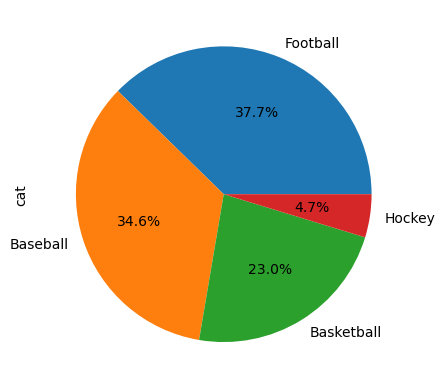

In [2125]:
labels = ["Football","Baseball","Basketball","Hockey"]
full_data['cat'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels)


<h3>Let's try to find the 100 most common words in title  by CountVectorizer</h3>

In [2257]:
vectorizer = CountVectorizer(stop_words ='english', lowercase=False, max_features=100)
vectorizer.fit_transform(full_data['title'].values.astype('U'))
vectorizer.get_feature_names_out()

array(['04', '06', '08', '10', '100', '13', '15', '18', '19', '1996',
       '1997', '1998', '1999', '20', '2000', '2003', '2007', '2017',
       '2018', '2019', '2020', '2021', '2022', '21', '22', '23', '25',
       '50', '97', '98', '99', 'Authentic', 'Autograph', 'Autographs',
       'BGS', 'Beckett', 'Black', 'Blue', 'Bowman', 'Bryant', 'Card',
       'Chrome', 'Collection', 'DNA', 'Deck', 'Donruss', 'Draft', 'Dual',
       'EX', 'Encased', 'Exquisite', 'Finest', 'Fleer', 'GEM', 'Game',
       'Gold', 'Green', 'James', 'Jersey', 'Joe', 'Jordan', 'Jr', 'Kobe',
       'LeBron', 'MINT', 'MT', 'Metal', 'Michael', 'Mosaic', 'NM',
       'National', 'Optic', 'Orange', 'PSA', 'Panini', 'Patch', 'Picks',
       'Pop', 'Premium', 'Prizm', 'Prospect', 'Prospects', 'Purple',
       'Red', 'Refractor', 'Relic', 'Rookie', 'SGC', 'SP', 'Select',
       'Signatures', 'Signed', 'Silver', 'SkyBox', 'The', 'Tom', 'Topps',
       'Treasures', 'Upper', 'VG'], dtype=object)

<h3>Let's see what are categories for those values</h3>
<ul>
    <li><i>04,06,100,21, ...</i>- those numbers have some meanings like number of shirt or amount of cards in the market,years,  etc...</li>
    <li><i>2003, 2020, 2021, 2022, ...</i> -  years of cards' series</li>
    <li><i>Authentic, Autograph, Autographs, Signatures, Signed</i> - those are special addings for cards</li>
    <li><i>BGS, PSA, Beckett, GEM, DNA, SGC, ...</i> - sports and trading card grading companies</li>
    <li><i>Black, Blue, Chrome, Gold, ...</i> - colors' meaning is rank of rarity, Gold sometimes can be rariest</li>
    <li><i>Optic, Mosaic, Prizm, Flawless, ...</i>,... - type of pack, Flawless is the most expensive </li>
    <li><i>James, Kobe, Jordan, Bryant, ...</i> - names of players</li>
    <li><i>MINT, MT, NM, EX, VG...</i>- cards condition</li>
    <li><i>Panini, Topps, SkyBox ...</i> - trading cards manufacturing companies</li>

</ul>

<h1>Let's begin with names of players, I searched on Google who are 15 best players of all time for each sport and check what are average price of card with those names by using of Regular Expressions on title</h1>

<h2>Basketball</h2>

In [2127]:
patterns_basketball_player = ['Jordan', 'LeBron', 'Kareem', 'Magic', 'Bryant', "Shaquille", 'Bird', 'Chamberlain', 'Russell', 'Curry','Duncan','Durant','Robertson','Olajuwon','Garnett']

for pattern in patterns_basketball_player:
    full_data[pattern+'_basketball'] = 0
    for i in range(len(full_data)):
        try:
            if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                full_data.at[i,pattern+'_basketball']=1
        except:
                full_data.at[i,pattern+'_basketball']=0


In [2128]:
df_average_basketball_player = pd.DataFrame()
for i in range(len(patterns)):
    row = pd.DataFrame({'player':patterns_basketball_player[i], 'average':str(full_data[(full_data['cat']==3) & full_data[patterns_basketball_player[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_player = pd.concat([row,df_average_basketball_player.loc[:]]).reset_index(drop=True)
df_average_basketball_player

C:\Users\motti\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,player,average
0,Garnett,403.8863636363636
1,Olajuwon,1021.0
2,Robertson,145.77777777777777
3,Durant,1703.2721518987341
4,Duncan,571.1261261261261
5,Curry,4054.8342541436464
6,Russell,3245.063829787234
7,Chamberlain,1316.7027027027027
8,Bird,8125.219178082192
9,Shaquille,917.1016042780749


<class 'numpy.float64'>


<BarContainer object of 15 artists>

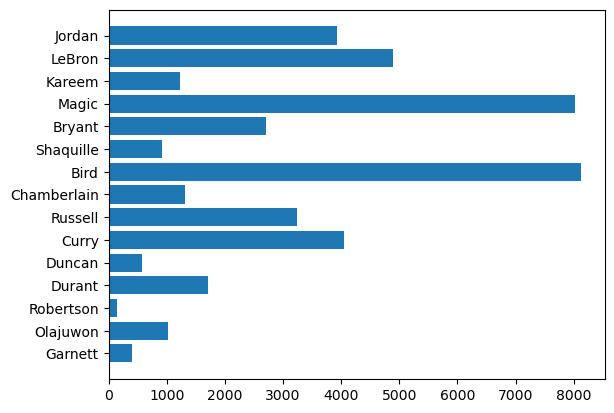

In [2258]:
x = np.array(df_average_basketball[df_average_basketball['average']!='nan'].player)
y = np.array(df_average_basketball[df_average_basketball['average']!='nan'].average)
y = y.astype(np.float64)
print(type(y[0]))

plt.barh(x, y)

<h2>Baseball</h2>

In [2130]:
patterns_baseball_player = ['Babe', 'Mays', 'Bonds', 'Williams', 'Aaron', 'Johnson', 'Cobb', 'Musial', 'Honus', 'Clemens','Gehrig','Mantle','Musial','Martinez','Griffey']

for pattern in patterns_baseball_player:
    full_data[pattern+'_baseball'] = 0
    for i in range(len(full_data)):
        try:
            if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                full_data.at[i,pattern+'_baseball']=1
        except:
                full_data.at[i,pattern+'_baseball']=0

In [2131]:
df_average_baseball_player = pd.DataFrame()
for i in range(len(patterns_baseball_player)):
    row = pd.DataFrame({'player':patterns_baseball_player[i], 'average':str(full_data[(full_data['cat']==2) & full_data[patterns_baseball_player[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_player = pd.concat([row,df_average_baseball_player.loc[:]]).reset_index(drop=True)
df_average_baseball_player

,player,average
0,Griffey,935.5945017182131
1,Martinez,344.8709677419355
2,Musial,398.8
3,Mantle,3595.1079545454545
4,Gehrig,12130.375
5,Clemens,136.45
6,Honus,6967.4
7,Musial,398.8
8,Cobb,6265.375
9,Johnson,396.1875


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\69172509.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 15 artists>

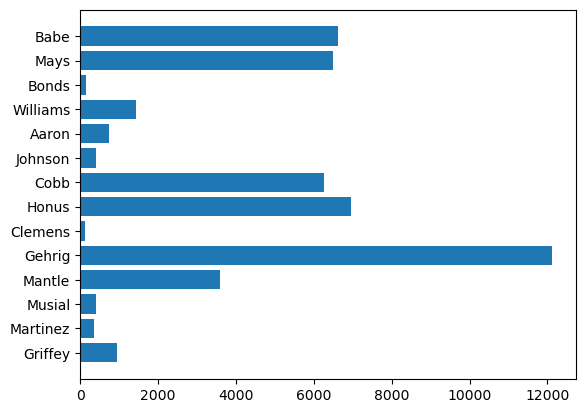

In [2132]:
x = np.array(df_average_baseball_player[df_average_baseball_player['average']!='nan'].player)
y = np.array(df_average_baseball_player[df_average_baseball_player['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Football</h2>

In [2133]:
patterns_football_player = ['Brady', 'Rice', 'Taylor', 'Brown', 'Montana', 'Payton', 'Reggie', 'Unitas', 'Manning', 'Emmitt','Green','Lott','Elway','Butkus','Lewis']

for pattern in patterns_football_player:
    full_data[pattern+'_football'] = 0
    for i in range(len(full_data)):
        try:
            if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                full_data.at[i,pattern+'_football']=1
        except:
                full_data.at[i,pattern+'_football']=0

In [2134]:
df_average_football_player = pd.DataFrame()
for i in range(len(patterns_football_player)):
    row = pd.DataFrame({'player':patterns_football_player[i], 'average':str(full_data[(full_data['cat']==1) & full_data[patterns_football_player[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_player = pd.concat([row,df_average_football_player.loc[:]]).reset_index(drop=True)
df_average_football_player

,player,average
0,Lewis,157.92857142857142
1,Butkus,660.2727272727273
2,Elway,37.816326530612244
3,Lott,188.28571428571428
4,Green,1345.2645502645503
5,Emmitt,120.9090909090909
6,Manning,327.58469945355193
7,Unitas,181.23076923076923
8,Reggie,174.5
9,Payton,1567.8035714285713


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3372097524.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 75 artists>

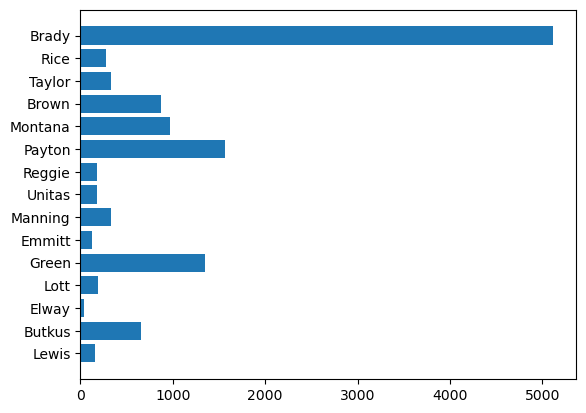

In [2135]:
x = np.array(df_average_football[df_average_football['average']!='nan'].player)
y = np.array(df_average_football[df_average_football['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2136]:
patterns_hockey_player = ['Chelios', 'Modano', 'Leetch', 'Tkachuk', 'Broten', 'Brimsek', 'LaFontaine', 'Howe', 'Housley', 'Roenick','Barrasso','Mullen','Richter','Weight','Suter']

for pattern in patterns_hockey_player:
    full_data[pattern+'_hockey'] = 0
    for i in range(len(full_data)):
        try:
            if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                full_data.at[i,pattern+'_hockey']=1
        except:
                full_data.at[i,pattern+'_hockey']=0

In [2137]:
df_average_hockey_player = pd.DataFrame()
for i in range(len(patterns_hockey_player)):
    row = pd.DataFrame({'player':patterns_hockey_player[i], 'average':str(full_data[(full_data['cat']==4) & full_data[patterns_hockey_player[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_player = pd.concat([row,df_average_hockey_player.loc[:]]).reset_index(drop=True)
df_average_hockey_player

,player,average
0,Suter,28.0
1,Weight,nan
2,Richter,28.0
3,Mullen,nan
4,Barrasso,nan
5,Roenick,12.6
6,Housley,11.0
7,Howe,3044.866666666667
8,LaFontaine,47.0
9,Brimsek,nan


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\2064614568.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 9 artists>

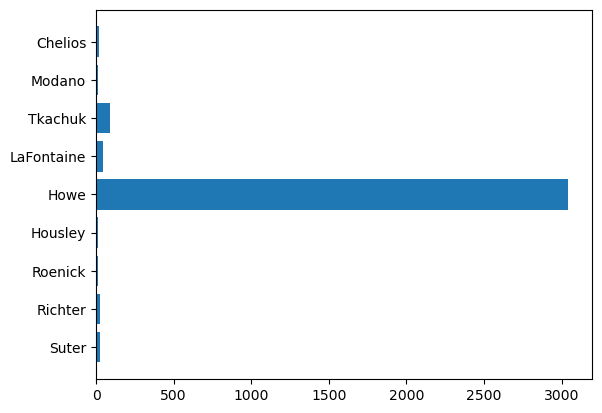

In [2138]:
x = np.array(df_average_hockey_player[df_average_hockey_player['average']!='nan'].player)
y = np.array(df_average_hockey_player[df_average_hockey_player['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h1>What about special addings for cards, if a card with autograph is more expensive? Let's see it, we compare those cards to mean of cards</h1>

<h2>Football</h2>

In [2139]:
print("Mean of price: ", full_data[full_data['cat']==1].price_cln.mean())

Mean of price:  1257.1060388209921


In [2140]:
patterns_football_addings = ['Authentic', 'Autograph', 'Autographs', 'Signatures', 'Signed']


for pattern in patterns_football_addings:
    full_data[pattern+"_football"]=0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0




In [2141]:
df_average_football_addings = pd.DataFrame()
for i in range(len(patterns_football_addings)):
    row = pd.DataFrame({'adding':patterns_football_addings[i], 'average':str(full_data[(full_data['cat']==1) & full_data[patterns_football_addings[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_addings = pd.concat([row,df_average_football_addings.loc[:]]).reset_index(drop=True)
df_average_football_addings

,adding,average
0,Signed,3821.740356083086
1,Signatures,1389.1385542168675
2,Autographs,2654.4511278195487
3,Autograph,5025.740697674419
4,Authentic,4212.290322580645


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1057307590.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 5 artists>

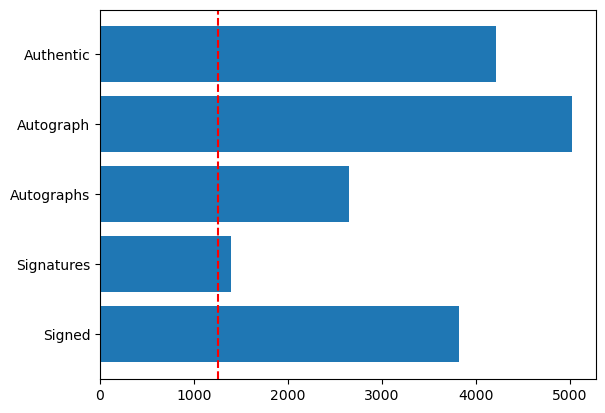

In [2142]:
x = np.array(df_average_football_addings[df_average_football_addings['average']!='nan'].adding)
y = np.array(df_average_football_addings[df_average_football_addings['average']!='nan'].average)
y = y.astype(np.float)
plt.axvline(full_data[full_data['cat']==1].price_cln.mean(), color='r', linestyle='--')#mean
plt.barh(x, y)

<h2>Basketball</h2>

In [2143]:
print("Mean of price: ", full_data[full_data['cat']==2].price_cln.mean())

Mean of price:  907.9609198141309


In [2144]:
patterns_basketball_addings = ['Authentic', 'Autograph', 'Autographs', 'Signatures', 'Signed']


for pattern in patterns_basketball_addings:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0




In [2145]:
df_average_basketball_addings = pd.DataFrame()
for i in range(len(patterns_basketball_addings)):
    row = pd.DataFrame({'adding':patterns_basketball_addings[i], 'average':str(full_data[(full_data['cat']==2) & full_data[patterns_basketball_addings[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_addings = pd.concat([row,df_average_basketball_addings.loc[:]]).reset_index(drop=True)
df_average_basketball_addings

,adding,average
0,Signed,1640.5757715338555
1,Signatures,566.8539325842696
2,Autographs,2646.028806584362
3,Autograph,1642.9655537890833
4,Authentic,2510.5


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3217517396.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 5 artists>

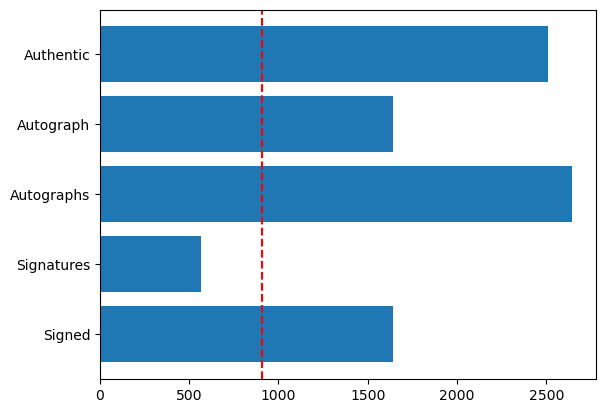

In [2146]:
x = np.array(df_average_basketball_addings[df_average_basketball_addings['average']!='nan'].adding)
y = np.array(df_average_basketball_addings[df_average_basketball_addings['average']!='nan'].average)
y = y.astype(np.float)
plt.axvline(full_data[full_data['cat']==2].price_cln.mean(), color='r', linestyle='--')#mean
plt.barh(x, y)

<h2>Baseball</h2>

In [2147]:
print("Mean of price: ", full_data[full_data['cat']==3].price_cln.mean())

Mean of price:  1879.219146608315


In [2148]:
patterns_baseball_addings = ['Authentic', 'Autograph', 'Autographs', 'Signatures', 'Signed']


for pattern in patterns_baseball_addings:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0




In [2149]:
df_average_baseball_addings = pd.DataFrame()
for i in range(len(patterns_baseball_addings)):
    row = pd.DataFrame({'adding':patterns_baseball_addings[i], 'average':str(full_data[(full_data['cat']==3) & full_data[patterns_baseball_addings[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_addings = pd.concat([row,df_average_baseball_addings.loc[:]]).reset_index(drop=True)
df_average_baseball_addings

,adding,average
0,Signed,4856.742547425474
1,Signatures,2376.5134408602153
2,Autographs,5598.072948328268
3,Autograph,5424.236940298508
4,Authentic,5807.78515625


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\869530235.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 5 artists>

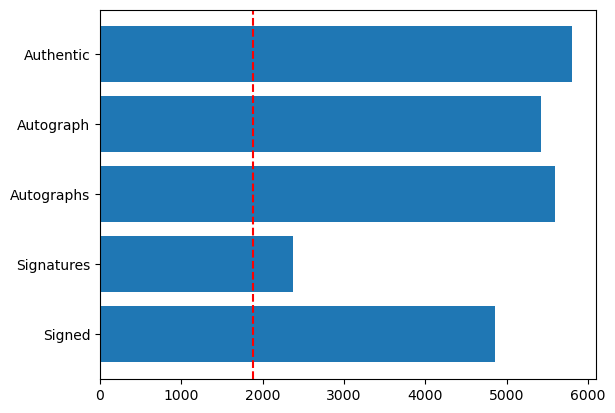

In [2150]:
x = np.array(df_average_baseball_addings[df_average_baseball_addings['average']!='nan'].adding)
y = np.array(df_average_baseball_addings[df_average_baseball_addings['average']!='nan'].average)
y = y.astype(np.float)
plt.axvline(full_data[full_data['cat']==3].price_cln.mean(), color='r', linestyle='--')#mean
plt.barh(x, y)

<h2>Hockey</h2>

In [2151]:
print("Mean of price: ", full_data[full_data['cat']==4].price_cln.mean())

Mean of price:  933.6666666666666


In [2152]:
patterns_hockey_addings = ['Authentic', 'Autograph', 'Autographs', 'Signatures', 'Signed']


for pattern in patterns_hockey_addings:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0




In [2153]:
df_average_hockey_addings = pd.DataFrame()
for i in range(len(patterns_hockey_addings)):
    row = pd.DataFrame({'adding':patterns_hockey_addings[i], 'average':str(full_data[(full_data['cat']==4) & full_data[patterns_hockey_addings[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_addings = pd.concat([row,df_average_hockey_addings.loc[:]]).reset_index(drop=True)
df_average_hockey_addings

,adding,average
0,Signed,1969.3774319066147
1,Signatures,162.52272727272728
2,Autographs,3246.2258064516127
3,Autograph,2779.9241379310347
4,Authentic,725.6315789473684


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\4202114211.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 5 artists>

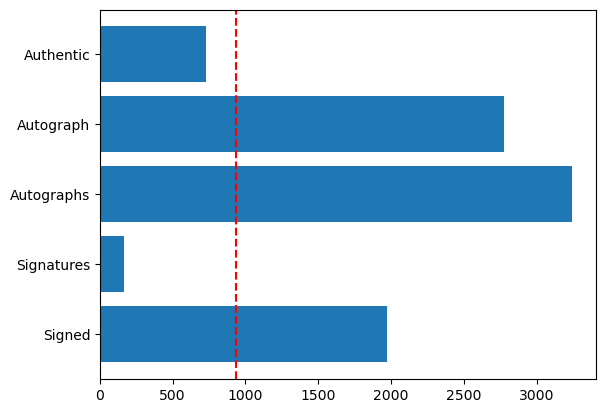

In [2154]:
x = np.array(df_average_hockey_addings[df_average_hockey_addings['average']!='nan'].adding)
y = np.array(df_average_hockey_addings[df_average_hockey_addings['average']!='nan'].average)
y = y.astype(np.float)
plt.axvline(full_data[full_data['cat']==4].price_cln.mean(), color='r', linestyle='--')#mean
plt.barh(x, y)

<h1>What about sports and trading card <u>grading companies</u>? There are companies that are more valuable as grading companies</h1>

<h2>Football</h2>

In [2155]:
patterns_football_grading = ['BGS', 'PSA', 'Beckett', 'GEM', 'DNA', 'SGC', 'CSG', 'HGA', 'ISA', 'GMA']


for pattern in patterns_football_grading:
    full_data[pattern+"_football"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0




In [2156]:
df_average_football_grading = pd.DataFrame()
for i in range(len(patterns_football_grading)):
    row = pd.DataFrame({'grading':patterns_football_grading[i], 'average':str(full_data[(full_data['cat']==1) & full_data[patterns_football_grading[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_grading = pd.concat([row,df_average_football_grading.loc[:]]).reset_index(drop=True)
df_average_football_grading

,grading,average
0,GMA,nan
1,ISA,nan
2,HGA,nan
3,CSG,413.1666666666667
4,SGC,2959.7511737089203
5,DNA,2511.577011494253
6,GEM,1591.9957420924575
7,Beckett,8582.210970464135
8,PSA,763.7338523038081
9,BGS,5622.379310344828


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1547211785.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

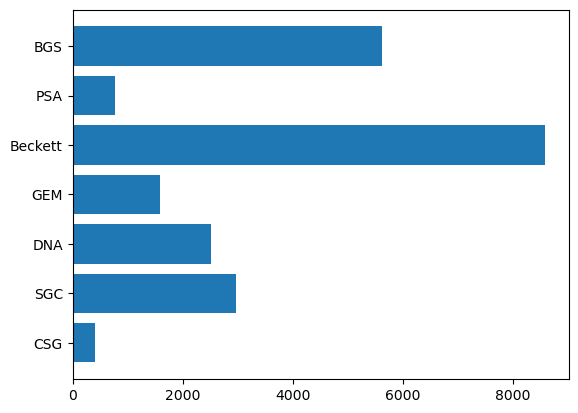

In [2157]:
x = np.array(df_average_football_grading[df_average_football_grading['average']!='nan'].grading)
y = np.array(df_average_football_grading[df_average_football_grading['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Baseball</h2>

In [2158]:
patterns_baseball_grading = ['BGS', 'PSA', 'Beckett', 'GEM', 'DNA', 'SGC', 'CSG', 'HGA', 'ISA', 'GMA']


for pattern in patterns_baseball_grading:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0




In [2159]:
df_average_baseball_grading = pd.DataFrame()
for i in range(len(patterns_baseball_grading)):
    row = pd.DataFrame({'grading':patterns_baseball_grading[i], 'average':str(full_data[(full_data['cat']==2) & full_data[patterns_baseball_grading[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_grading = pd.concat([row,df_average_baseball_grading.loc[:]]).reset_index(drop=True)
df_average_baseball_grading

,grading,average
0,GMA,nan
1,ISA,nan
2,HGA,nan
3,CSG,32.5
4,SGC,1954.5303514376997
5,DNA,1894.5291666666667
6,GEM,1023.8390367553866
7,Beckett,4388.946700507614
8,PSA,638.4844499246473
9,BGS,3419.017571884984


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\558153303.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

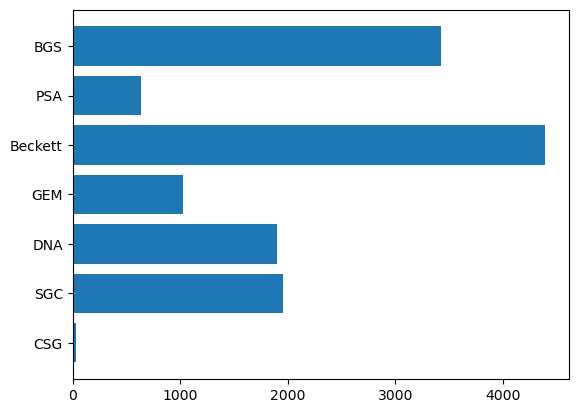

In [2160]:
x = np.array(df_average_baseball_grading[df_average_baseball_grading['average']!='nan'].grading)
y = np.array(df_average_baseball_grading[df_average_baseball_grading['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Basketball</h2>

In [2161]:
patterns_basketball_grading = ['BGS', 'PSA', 'Beckett', 'GEM', 'DNA', 'SGC', 'CSG', 'HGA', 'ISA', 'GMA']


for pattern in patterns_basketball_grading:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0




In [2162]:
df_average_basketball_grading = pd.DataFrame()
for i in range(len(patterns_basketball_grading)):
    row = pd.DataFrame({'grading':patterns_basketball_grading[i], 'average':str(full_data[(full_data['cat']==3) & full_data[patterns_basketball_grading[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_grading = pd.concat([row,df_average_basketball_grading.loc[:]]).reset_index(drop=True)
df_average_basketball_grading

,grading,average
0,GMA,nan
1,ISA,nan
2,HGA,nan
3,CSG,164.625
4,SGC,434.1236442516269
5,DNA,5049.778398510242
6,GEM,3072.564316860465
7,Beckett,11258.149253731342
8,PSA,1225.2597815567538
9,BGS,5947.874789915966


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1329030733.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

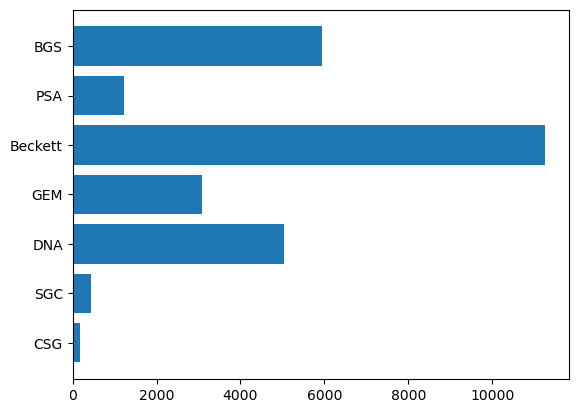

In [2163]:
x = np.array(df_average_basketball_grading[df_average_basketball_grading['average']!='nan'].grading)
y = np.array(df_average_basketball_grading[df_average_basketball_grading['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2164]:
patterns_hockey_grading = ['BGS', 'PSA', 'Beckett', 'GEM', 'DNA', 'SGC', 'CSG', 'HGA', 'ISA', 'GMA']


for pattern in patterns_hockey_grading:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0




In [2165]:
df_average_hockey_grading = pd.DataFrame()
for i in range(len(patterns_hockey_grading)):
    row = pd.DataFrame({'grading':patterns_hockey_grading[i], 'average':str(full_data[(full_data['cat']==4) & full_data[patterns_hockey_grading[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_grading = pd.concat([row,df_average_hockey_grading.loc[:]]).reset_index(drop=True)
df_average_hockey_grading

,grading,average
0,GMA,nan
1,ISA,nan
2,HGA,nan
3,CSG,nan
4,SGC,3509.0
5,DNA,858.595041322314
6,GEM,977.6454545454545
7,Beckett,11385.758620689656
8,PSA,496.0
9,BGS,6843.246153846154


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\924461308.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 6 artists>

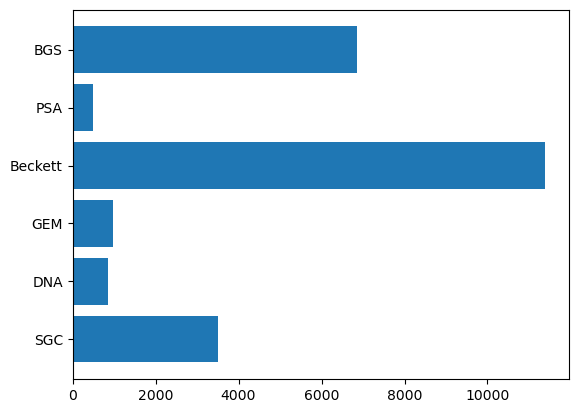

In [2166]:
x = np.array(df_average_hockey_grading[df_average_hockey_grading['average']!='nan'].grading)
y = np.array(df_average_hockey_grading[df_average_hockey_grading['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h1>What about types of packs? There are packs that are more expensive? Let's see...</h1>
<h3>All types are Panini's packs</h3>

<h2>Football</h2>

In [2167]:
patterns_football_pack = ['Flawless', 'National Treasures', 'Eminence', 'Immaculate', 'Opulence', 'Impeccable', 'Noir', 'One and One', 'Select', 'Spectra', 'Prizm', 'Optic', 'Mosaic']

for pattern in patterns_football_pack:
    full_data[pattern+"_football"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0




In [2168]:
df_average_football_pack = pd.DataFrame()
for i in range(len(patterns_football_pack)):
    row = pd.DataFrame({'pack':patterns_football_pack[i], 'average':str(full_data[(full_data['cat']==1) & full_data[patterns_football_pack[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_pack = pd.concat([row,df_average_football_pack.loc[:]]).reset_index(drop=True)
df_average_football_pack

,pack,average
0,Mosaic,127.10924369747899
1,Optic,1082.3858024691358
2,Prizm,1084.6361149110808
3,Spectra,360.30434782608694
4,Select,457.93905817174516
5,One and One,nan
6,Noir,nan
7,Impeccable,617.5
8,Opulence,nan
9,Immaculate,1636.157894736842


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1823757561.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 10 artists>

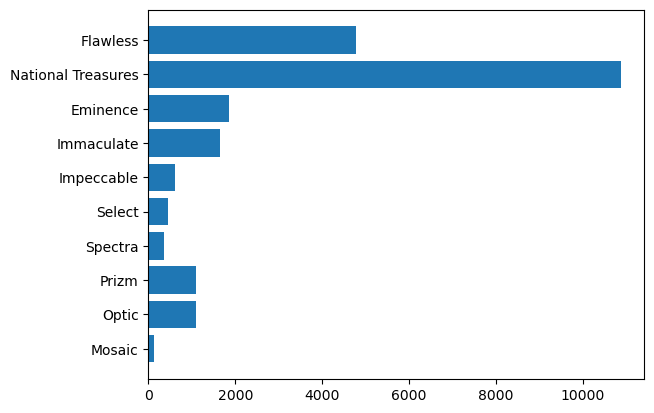

In [2169]:
x = np.array(df_average_football_pack[df_average_football_pack['average']!='nan'].pack)
y = np.array(df_average_football_pack[df_average_football_pack['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Baseball</h2>

In [2170]:
patterns_baseball_pack = ['Flawless', 'National Treasures', 'Eminence', 'Immaculate', 'Opulence', 'Impeccable', 'Noir', 'One and One', 'Select', 'Spectra', 'Prizm', 'Optic', 'Mosaic']

for pattern in patterns_baseball_pack:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0




In [2171]:
df_average_baseball_pack = pd.DataFrame()
for i in range(len(patterns_baseball_pack)):
    row = pd.DataFrame({'pack':patterns_baseball_pack[i], 'average':str(full_data[(full_data['cat']==2) & full_data[patterns_baseball_pack[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_pack = pd.concat([row,df_average_baseball_pack.loc[:]]).reset_index(drop=True)
df_average_baseball_pack

,pack,average
0,Mosaic,53.0
1,Optic,216.17333333333335
2,Prizm,133.83064516129033
3,Spectra,28.0
4,Select,268.0
5,One and One,40.0
6,Noir,nan
7,Impeccable,nan
8,Opulence,nan
9,Immaculate,209.34782608695653


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1239351055.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 9 artists>

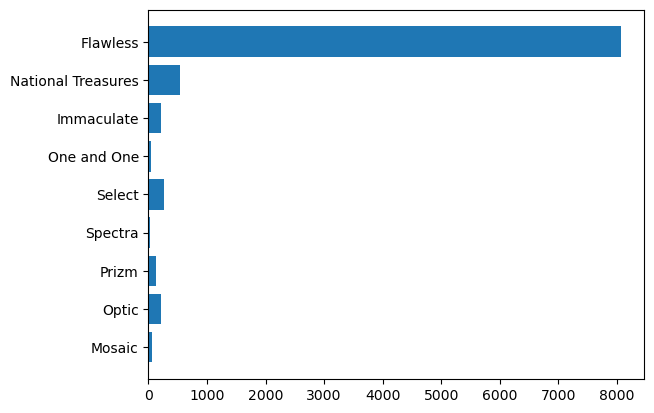

In [2172]:
x = np.array(df_average_baseball_pack[df_average_baseball_pack['average']!='nan'].pack)
y = np.array(df_average_baseball_pack[df_average_baseball_pack['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Basketball</h2>

In [2173]:
patterns_basketball_pack = ['Flawless', 'National Treasures', 'Eminence', 'Immaculate', 'Opulence', 'Impeccable', 'Noir', 'One and One', 'Select', 'Spectra', 'Prizm', 'Optic', 'Mosaic']

for pattern in patterns_basketball_pack:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0




In [2174]:
df_average_basketball_pack = pd.DataFrame()
for i in range(len(patterns_basketball_pack)):
    row = pd.DataFrame({'pack':patterns_basketball_pack[i], 'average':str(full_data[(full_data['cat']==3) & full_data[patterns_basketball_pack[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_pack = pd.concat([row,df_average_basketball_pack.loc[:]]).reset_index(drop=True)
df_average_basketball_pack

,pack,average
0,Mosaic,255.1386554621849
1,Optic,628.7272727272727
2,Prizm,799.8537134283571
3,Spectra,743.974025974026
4,Select,406.8343023255814
5,One and One,444.94736842105266
6,Noir,418.6842105263158
7,Impeccable,654.4642857142857
8,Opulence,2220.0
9,Immaculate,2909.9220779220777


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\2005864083.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 13 artists>

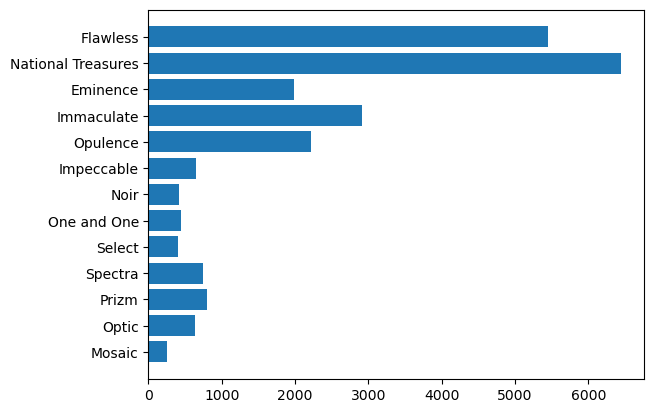

In [2175]:
x = np.array(df_average_basketball_pack[df_average_basketball_pack['average']!='nan'].pack)
y = np.array(df_average_basketball_pack[df_average_basketball_pack['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2176]:
patterns_hockey_pack = ['Flawless', 'National Treasures', 'Eminence', 'Immaculate', 'Opulence', 'Impeccable', 'Noir', 'One and One', 'Select', 'Spectra', 'Prizm', 'Optic', 'Mosaic']

for pattern in patterns_hockey_pack:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0




In [2177]:
df_average_hockey_pack = pd.DataFrame()
for i in range(len(patterns_hockey_pack)):
    row = pd.DataFrame({'pack':patterns_hockey_pack[i], 'average':str(full_data[(full_data['cat']==4) & full_data[patterns_hockey_pack[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_pack = pd.concat([row,df_average_hockey_pack.loc[:]]).reset_index(drop=True)
df_average_hockey_pack

,pack,average
0,Mosaic,nan
1,Optic,nan
2,Prizm,35.0
3,Spectra,nan
4,Select,21.125
5,One and One,nan
6,Noir,nan
7,Impeccable,nan
8,Opulence,nan
9,Immaculate,nan


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3224962508.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 3 artists>

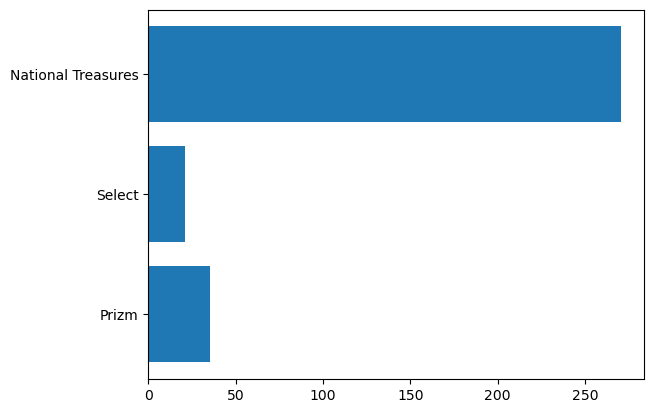

In [2178]:
x = np.array(df_average_hockey_pack[df_average_hockey_pack['average']!='nan'].pack)
y = np.array(df_average_hockey_pack[df_average_hockey_pack['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h1>Card's rank is mostly defined by color, let's check what are expensive colors</h1>

<h2>Football</h2>

In [2179]:
patterns_football_color = ['Silver', 'Blue', 'Gold', 'Black', 'Green', 'Hyper', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Mojo', 'Bronze', 'Platinum', 'Viny']

for pattern in patterns_football_color:
    full_data[pattern+"_football"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0



In [2180]:
df_average_football_color = pd.DataFrame()
for i in range(len(patterns_football_color)):
    row = pd.DataFrame({'color':patterns_football_color[i], 'average':str(full_data[(full_data['cat']==1)& full_data[patterns_football_color[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_color = pd.concat([row,df_average_football_color.loc[:]]).reset_index(drop=True)
df_average_football_color

,color,average
0,Viny,10814.9375
1,Platinum,7447.403508771929
2,Bronze,1507.0714285714287
3,Mojo,165.4
4,White,370.9741379310345
5,Red,799.3782608695652
6,Purple,324.1025641025641
7,Pink,74.26086956521739
8,Orange,246.47169811320754
9,Hyper,190.47619047619048


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3488577343.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 15 artists>

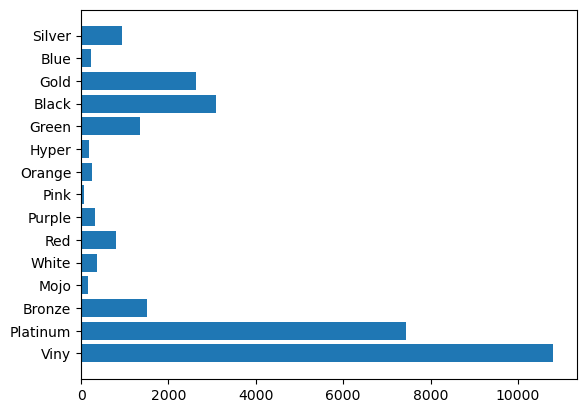

In [2181]:
x = np.array(df_average_football_color[df_average_football_color['average']!='nan'].color)
y = np.array(df_average_football_color[df_average_football_color['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Baseball</h2>

In [2182]:
patterns_baseball_color = ['Silver', 'Blue', 'Gold', 'Black', 'Green', 'Hyper', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Mojo', 'Bronze', 'Platinum', 'Viny']

for pattern in patterns_baseball_color:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0



In [2183]:
df_average_baseball_color = pd.DataFrame()
for i in range(len(patterns_baseball_color)):
    row = pd.DataFrame({'color':patterns_baseball_color[i], 'average':str(full_data[(full_data['cat']==2)& full_data[patterns_baseball_color[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_color = pd.concat([row,df_average_baseball_color.loc[:]]).reset_index(drop=True)
df_average_baseball_color

,color,average
0,Viny,1737.7777777777778
1,Platinum,183.10795454545453
2,Bronze,151.21428571428572
3,Mojo,95.5
4,White,1340.7704918032787
5,Red,4235.090909090909
6,Purple,360.63392857142856
7,Pink,81.5813953488372
8,Orange,2049.1039603960394
9,Hyper,17.5


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\702829414.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 15 artists>

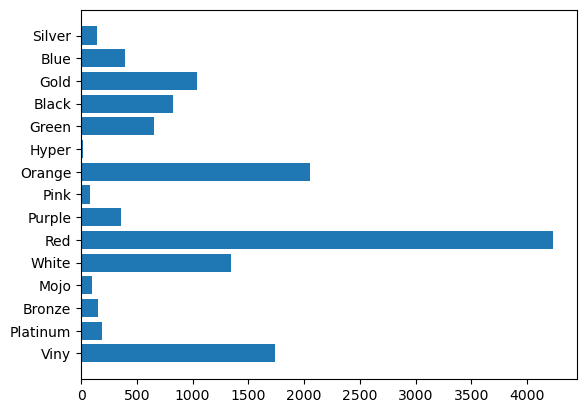

In [2184]:
x = np.array(df_average_baseball_color[df_average_baseball_color['average']!='nan'].color)
y = np.array(df_average_baseball_color[df_average_baseball_color['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

Red?! Why? Ahhh...maybe on titles about baseball cards showed  also name of famous team "Boston Red Sox"

<h2>Basketball</h2>

In [2185]:
patterns_basketball_color = ['Silver', 'Blue', 'Gold', 'Black', 'Green', 'Hyper', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Mojo', 'Bronze', 'Platinum', 'Viny']

for pattern in patterns_basketball_color:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0



In [2186]:
df_average_basketball_color = pd.DataFrame()
for i in range(len(patterns_basketball_color)):
    row = pd.DataFrame({'color':patterns_basketball_color[i], 'average':str(full_data[(full_data['cat']==3)& full_data[patterns_basketball_color[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_color = pd.concat([row,df_average_basketball_color.loc[:]]).reset_index(drop=True)
df_average_basketball_color

,color,average
0,Viny,10303.785714285714
1,Platinum,7231.575757575758
2,Bronze,644.3137254901961
3,Mojo,1432.142857142857
4,White,586.276923076923
5,Red,443.69436201780417
6,Purple,286.65986394557825
7,Pink,408.7096774193548
8,Orange,581.3680555555555
9,Hyper,90.75


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1504342628.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 15 artists>

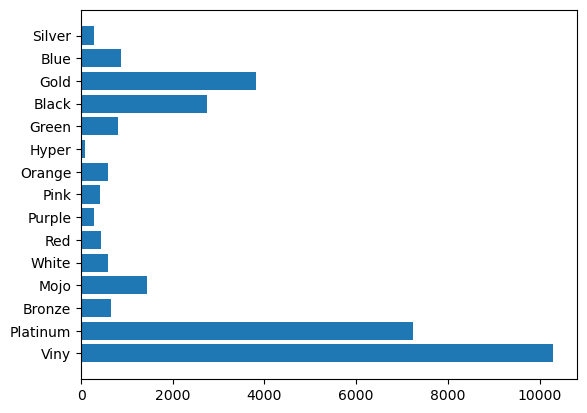

In [2187]:
x = np.array(df_average_basketball_color[df_average_basketball_color['average']!='nan'].color)
y = np.array(df_average_basketball_color[df_average_basketball_color['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2188]:
patterns_hockey_color = ['Silver', 'Blue', 'Gold', 'Black', 'Green', 'Hyper', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Mojo', 'Bronze', 'Platinum', 'Viny']

for pattern in patterns_hockey_color:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0



In [2189]:
df_average_hockey_color = pd.DataFrame()
for i in range(len(patterns_hockey_color)):
    row = pd.DataFrame({'color':patterns_hockey_color[i], 'average':str(full_data[(full_data['cat']==4)& full_data[patterns_hockey_color[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_color = pd.concat([row,df_average_hockey_color.loc[:]]).reset_index(drop=True)
df_average_hockey_color

,color,average
0,Viny,nan
1,Platinum,774.7777777777778
2,Bronze,16.0
3,Mojo,nan
4,White,179.0
5,Red,1180.1739130434783
6,Purple,727.75
7,Pink,nan
8,Orange,31.0
9,Hyper,nan


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\2572309677.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 11 artists>

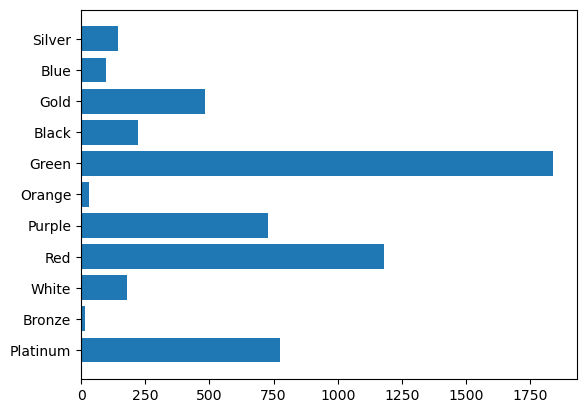

In [2190]:
x = np.array(df_average_hockey_color[df_average_hockey_color['average']!='nan'].color)
y = np.array(df_average_hockey_color[df_average_hockey_color['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h1>What about card's condition? Mint or MT means that card is more expensive?</h1>


<h2>Football</h2>

In [2191]:

patterns_football_condition = ['MT', 'MINT','NM', 'EX', 'VG', 'GD','GOOD', 'FR']

for pattern in patterns_football_condition:
    full_data[pattern+"_football"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0



In [2192]:
df_average_football_condition = pd.DataFrame()
for i in range(len(patterns_football_condition)):
    row = pd.DataFrame({'condition':patterns_football_condition[i], 'average':str(full_data[(full_data['cat']==1)& full_data[patterns_football_condition[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_condition = pd.concat([row,df_average_football_condition.loc[:]]).reset_index(drop=True)
df_average_football_condition

,condition,average
0,FR,199.88888888888889
1,GOOD,83.0
2,GD,965.1538461538462
3,VG,561.5142857142857
4,EX,165.53470437017995
5,NM,1391.537061994609
6,MINT,1116.2471855115027
7,MT,1392.1181948424069


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\2080099065.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 8 artists>

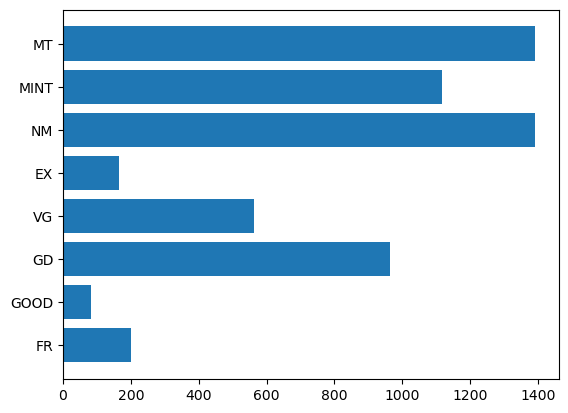

In [2193]:
x = np.array(df_average_football_condition[df_average_football_condition['average']!='nan'].condition)
y = np.array(df_average_football_condition[df_average_football_condition['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Baseball</h2>

In [2194]:

patterns_baseball_condition = ['MT', 'MINT','NM', 'EX', 'VG', 'GD','GOOD', 'FR']

for pattern in patterns_baseball_condition:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    #Here we can see why most card in condition of FR are expensive, maybe because those cards are more old and their value is higher
                    #if(pattern == 'FR'):
                    #    print(full_data.at[i,'link'])
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0



In [2195]:
df_average_baseball_condition = pd.DataFrame()
for i in range(len(patterns_baseball_condition)):
    row = pd.DataFrame({'condition':patterns_baseball_condition[i], 'average':str(full_data[(full_data['cat']==2)& full_data[patterns_baseball_condition[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_condition = pd.concat([row,df_average_baseball_condition.loc[:]]).reset_index(drop=True)
df_average_baseball_condition

,condition,average
0,FR,2434.060606060606
1,GOOD,11400.0
2,GD,2016.6336633663366
3,VG,2016.909090909091
4,EX,1244.5533333333333
5,NM,634.0801796023092
6,MINT,862.4106164383562
7,MT,668.3697855291068


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3388700854.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 8 artists>

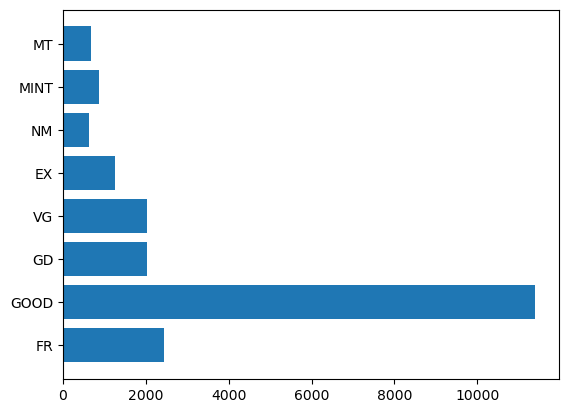

In [2196]:
x = np.array(df_average_baseball_condition[df_average_baseball_condition['average']!='nan'].condition)
y = np.array(df_average_baseball_condition[df_average_baseball_condition['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

What a surprise! Why do cards in condition of FR or GOOD are expensive than MINT or MT? I think that it's because that cards in fair condition are older therefore those cards are rare

<h2>Baketball</h2>

In [2197]:

patterns_basketball_condition = ['MT', 'MINT','NM', 'EX', 'VG', 'GD','GOOD', 'FR']

for pattern in patterns_basketball_condition:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0



In [2198]:
df_average_basketball_condition = pd.DataFrame()
for i in range(len(patterns_basketball_condition)):
    row = pd.DataFrame({'condition':patterns_basketball_condition[i], 'average':str(full_data[(full_data['cat']==3)& full_data[patterns_basketball_condition[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_condition = pd.concat([row,df_average_basketball_condition.loc[:]]).reset_index(drop=True)
df_average_basketball_condition

,condition,average
0,FR,100.26666666666667
1,GOOD,nan
2,GD,549.875
3,VG,3131.4328358208954
4,EX,1075.8445692883895
5,NM,1316.6266924564798
6,MINT,1879.8796680497926
7,MT,1743.3588812980358


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\668477877.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

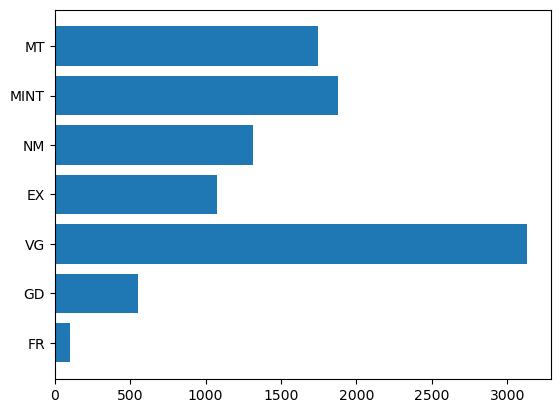

In [2199]:
x = np.array(df_average_basketball_condition[df_average_basketball_condition['average']!='nan'].condition)
y = np.array(df_average_basketball_condition[df_average_basketball_condition['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2200]:

patterns_hockey_condition = ['MT', 'MINT','NM', 'EX', 'VG', 'GD','GOOD', 'FR']

for pattern in patterns_hockey_condition:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0



In [2201]:
df_average_hockey_condition = pd.DataFrame()
for i in range(len(patterns_hockey_condition)):
    row = pd.DataFrame({'condition':patterns_hockey_condition[i], 'average':str(full_data[(full_data['cat']==4)& full_data[patterns_hockey_condition[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_condition = pd.concat([row,df_average_hockey_condition.loc[:]]).reset_index(drop=True)
df_average_hockey_condition

,condition,average
0,FR,267.5
1,GOOD,nan
2,GD,443.5
3,VG,922.8095238095239
4,EX,586.9753086419753
5,NM,943.6059907834101
6,MINT,1016.0196629213483
7,MT,1008.8968531468531


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\1374694798.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

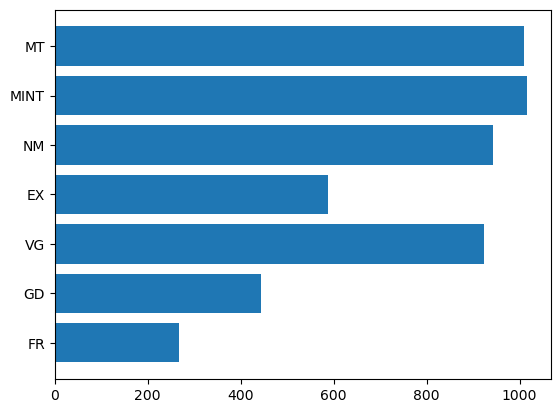

In [2202]:
x = np.array(df_average_hockey_condition[df_average_hockey_condition['average']!='nan'].condition)
y = np.array(df_average_hockey_condition[df_average_hockey_condition['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h1>There are trading cards manufacturers that make more expensive cards? which?</h1>

<h2>Football</h2>

In [2203]:

patterns_football_manufacturer = ['Topps', 'Upper Deck','Panini', 'In The Game', 'Press Pass', 'Tristar','SkyBox', 'Leaf', 'SAGE']

for pattern in patterns_football_manufacturer:
    full_data[pattern+"_football"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==1):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_football"]=1
            except:
                    full_data.at[i,pattern+"_football"]=0



In [2204]:
df_average_football_manufacturer = pd.DataFrame()
for i in range(len(patterns_football_manufacturer)):
    row = pd.DataFrame({'manufacturer':patterns_football_manufacturer[i], 'average':str(full_data[(full_data['cat']==1)& full_data[patterns_football_manufacturer[i]+'_football']==1].price_cln.mean())}, index=[0])
    df_average_football_manufacturer = pd.concat([row,df_average_football_manufacturer.loc[:]]).reset_index(drop=True)
df_average_football_manufacturer

,manufacturer,average
0,SAGE,nan
1,Leaf,107.23015873015873
2,SkyBox,134.54545454545453
3,Tristar,nan
4,Press Pass,550.8421052631579
5,In The Game,nan
6,Panini,1565.1386239782016
7,Upper Deck,1715.0412844036698
8,Topps,380.00493096646943


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\3749515697.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 6 artists>

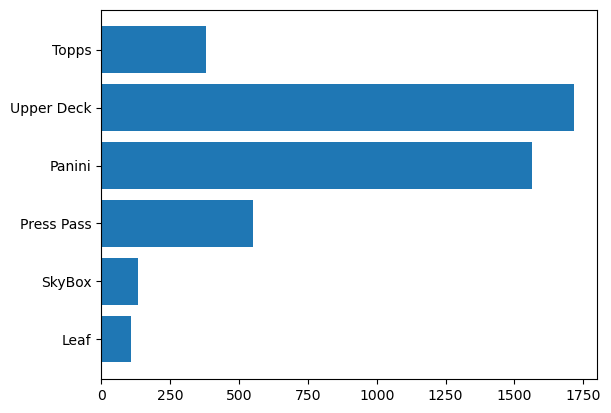

In [2205]:
x = np.array(df_average_football_manufacturer[df_average_football_manufacturer['average']!='nan'].manufacturer)
y = np.array(df_average_football_manufacturer[df_average_football_manufacturer['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Baseball</h2>

In [2206]:

patterns_baseball_manufacturer = ['Topps', 'Upper Deck','Panini', 'In The Game', 'Press Pass', 'Tristar','SkyBox', 'Leaf', 'SAGE']

for pattern in patterns_baseball_manufacturer:
    full_data[pattern+"_baseball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==2):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_baseball"]=1
            except:
                    full_data.at[i,pattern+"_baseball"]=0



In [2207]:
df_average_baseball_manufacturer = pd.DataFrame()
for i in range(len(patterns_baseball_manufacturer)):
    row = pd.DataFrame({'manufacturer':patterns_baseball_manufacturer[i], 'average':str(full_data[(full_data['cat']==2)& full_data[patterns_baseball_manufacturer[i]+'_baseball']==1].price_cln.mean())}, index=[0])
    df_average_baseball_manufacturer = pd.concat([row,df_average_baseball_manufacturer.loc[:]]).reset_index(drop=True)
df_average_baseball_manufacturer

,manufacturer,average
0,SAGE,nan
1,Leaf,699.6355140186915
2,SkyBox,4359.1
3,Tristar,269.0
4,Press Pass,nan
5,In The Game,13.0
6,Panini,584.8834745762712
7,Upper Deck,616.6917960088692
8,Topps,662.7442042198489


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\2340069780.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

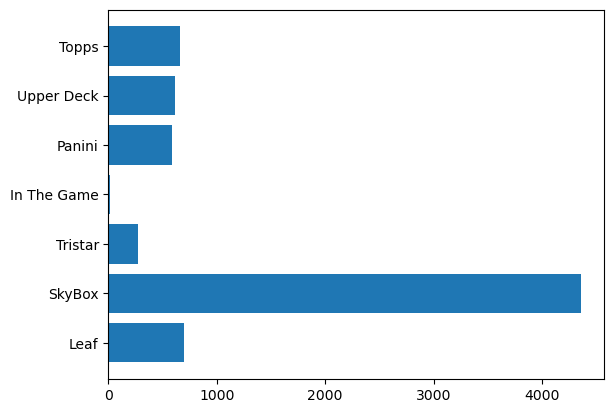

In [2208]:
x = np.array(df_average_baseball_manufacturer[df_average_baseball_manufacturer['average']!='nan'].manufacturer)
y = np.array(df_average_baseball_manufacturer[df_average_baseball_manufacturer['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Basketball</h2>

In [2209]:

patterns_basketball_manufacturer = ['Topps', 'Upper Deck','Panini', 'In The Game', 'Press Pass', 'Tristar','SkyBox', 'Leaf', 'SAGE']

for pattern in patterns_basketball_manufacturer:
    full_data[pattern+"_basketball"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==3):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_basketball"]=1
            except:
                    full_data.at[i,pattern+"_basketball"]=0



In [2210]:
df_average_basketball_manufacturer = pd.DataFrame()
for i in range(len(patterns_basketball_manufacturer)):
    row = pd.DataFrame({'manufacturer':patterns_basketball_manufacturer[i], 'average':str(full_data[(full_data['cat']==3)& full_data[patterns_basketball_manufacturer[i]+'_basketball']==1].price_cln.mean())}, index=[0])
    df_average_basketball_manufacturer = pd.concat([row,df_average_basketball_manufacturer.loc[:]]).reset_index(drop=True)
df_average_basketball_manufacturer

,manufacturer,average
0,SAGE,nan
1,Leaf,220.54545454545453
2,SkyBox,2516.0923482849603
3,Tristar,nan
4,Press Pass,446.5
5,In The Game,841.0
6,Panini,1245.3744594250827
7,Upper Deck,2802.4946682464456
8,Topps,1752.6157501697217


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\789729603.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 7 artists>

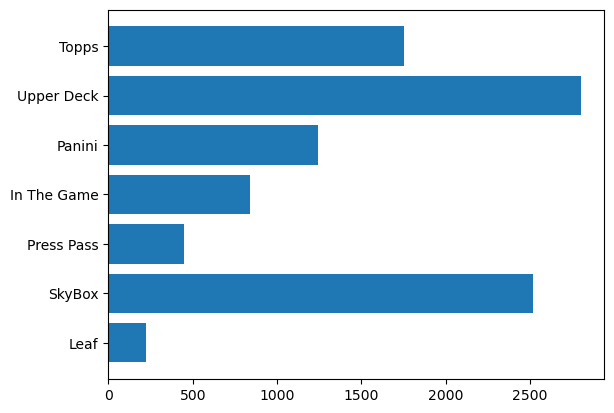

In [2211]:
x = np.array(df_average_basketball_manufacturer[df_average_basketball_manufacturer['average']!='nan'].manufacturer)
y = np.array(df_average_basketball_manufacturer[df_average_basketball_manufacturer['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

<h2>Hockey</h2>

In [2212]:

patterns_hockey_manufacturer = ['Topps', 'Upper Deck','Panini', 'In The Game', 'Press Pass', 'Tristar','SkyBox', 'Leaf', 'SAGE']

for pattern in patterns_hockey_manufacturer:
    full_data[pattern+"_hockey"] = 0
    for i in range(len(full_data)):
        if(full_data.at[i,'cat']==4):
            try:
                if(re.match(".*"+pattern+".*", full_data.at[i,'title'])):
                    full_data.at[i,pattern+"_hockey"]=1
            except:
                    full_data.at[i,pattern+"_hockey"]=0



In [2213]:
df_average_hockey_manufacturer = pd.DataFrame()
for i in range(len(patterns_hockey_manufacturer)):
    row = pd.DataFrame({'manufacturer':patterns_hockey_manufacturer[i], 'average':str(full_data[(full_data['cat']==4)& full_data[patterns_hockey_manufacturer[i]+'_hockey']==1].price_cln.mean())}, index=[0])
    df_average_hockey_manufacturer = pd.concat([row,df_average_hockey_manufacturer.loc[:]]).reset_index(drop=True)
df_average_hockey_manufacturer


,manufacturer,average
0,SAGE,nan
1,Leaf,84.125
2,SkyBox,998.76
3,Tristar,nan
4,Press Pass,nan
5,In The Game,182.375
6,Panini,400.05555555555554
7,Upper Deck,1189.4708333333333
8,Topps,607.7553956834532


C:\Users\motti\AppData\Local\Temp\ipykernel_19792\20994128.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


<BarContainer object of 6 artists>

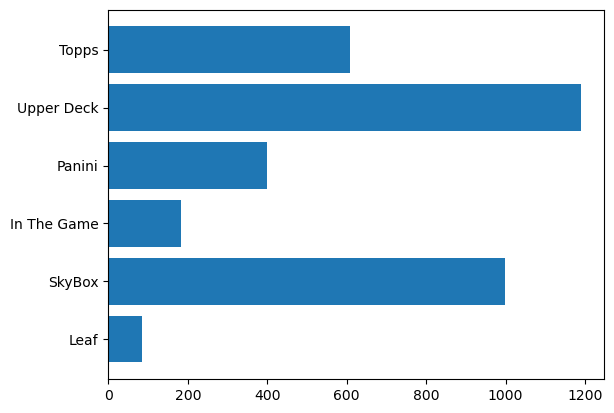

In [2214]:
x = np.array(df_average_hockey_manufacturer[df_average_hockey_manufacturer['average']!='nan'].manufacturer)
y = np.array(df_average_hockey_manufacturer[df_average_hockey_manufacturer['average']!='nan'].average)
y = y.astype(np.float)
plt.barh(x, y)

After I finished to create visual graphs that based on categories from words list, let's check what about years of cards or number of bids, they have any correlation with end price?

In [2215]:
full_data['title'].head(20)

0     2000 Playoff Contenders Championship Ticket Au...
1     1976 Topps #148 Walter Payton Rookie Card – PS...
2     2021 Panini National Treasures Rookie Patch Au...
3     2000 Playoff Contenders Championship Ticket Au...
4     1933 Sport Kings #6 Jim Thorpe, Football - PSA...
5     1981 Topps #216 Joe Montana Rookie Card – PSA ...
6     1933 Sport Kings #4 Red Grange, Football - PSA...
7     2000 Bowman Chrome Refractor #236 Tom Brady Ro...
8     2000 Bowman Chrome Refractor #236 Tom Brady Ro...
9     2017 Panini National Treasures Rookie Patch Au...
10    2017 Panini Donruss Optic Rated Rookie Autogra...
11    2017 Panini National Treasures Rookie Patch Au...
12    2017 Panini National Treasures Rookie Patch Au...
13    2017 Panini National Treasures Rookie Patch Au...
14    2018 Panini National Treasures Rookie Patch Au...
15    2018 Panini Contenders Super Bowl Ticket Autog...
16    2020 Panini National Treasures Rookie Patch Au...
17    2021 Panini National Treasures Rookie Patc

We can see that all titles begin with year of series, so we can use at Regular Expression to extricate years and crate new column for year, let's start do

In [2216]:
for i in range(len(full_data)):
    try:
        pattern_year = "^([1-2][0-9][0-9][0-9]).*"
        full_data.at[i,'year'] = float(re.match(pattern_year, full_data.at[i,'title']).groups(0)[0])
    except:
        full_data.at[i,'year']=None


In [2217]:
full_data[full_data['year'].isnull()].year.count()

0

Excellent! We have not null values in years!
Now we can check the correlation betweem end price to year by scatter plot

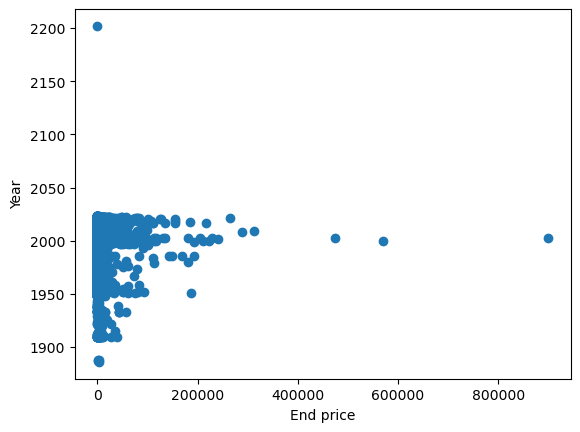

In [2218]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(full_data.price_cln, full_data.year)
plt.xlabel('End price')
plt.ylabel('Year')
plt.show()

We need to filter exceptional values like price over 200000 or year after 2023 and to try again with scatter plot

In [2219]:
full_data_cln = full_data[(full_data['year']<=2023) & (full_data['price_cln']<=200000)].copy()

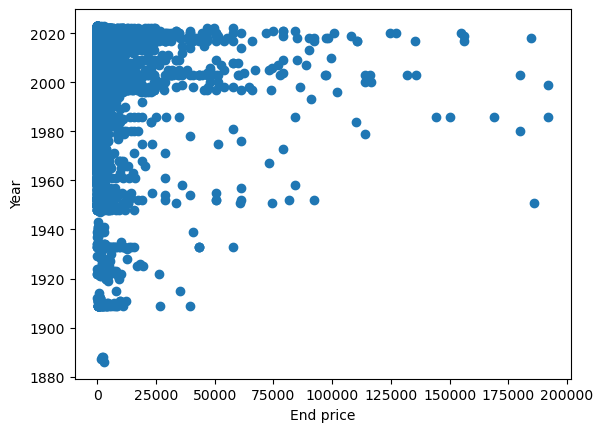

In [2220]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(full_data_cln.price_cln, full_data_cln.year)
plt.xlabel('End price')
plt.ylabel('Year')
plt.show()

It looks like no any correlation between year to end price

Let's check if there is any correlation between amount of bids to end price, again, by scatter plot

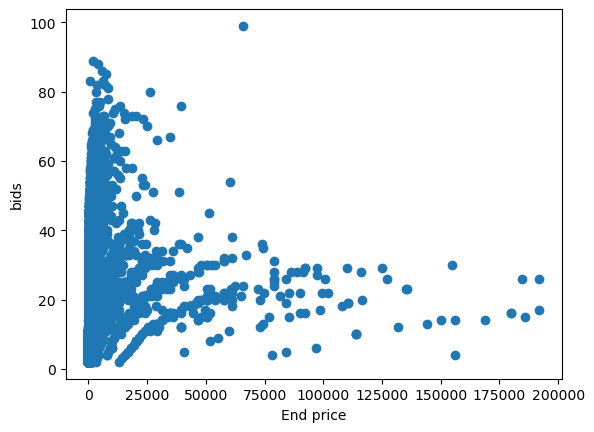

In [2221]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(full_data_cln.price_cln, full_data_cln.bids)
plt.xlabel('End price')
plt.ylabel('bids')
plt.show()

I think that this chart shows there's no any correlation as well

Maybe type of sport can be enough significant for end price?

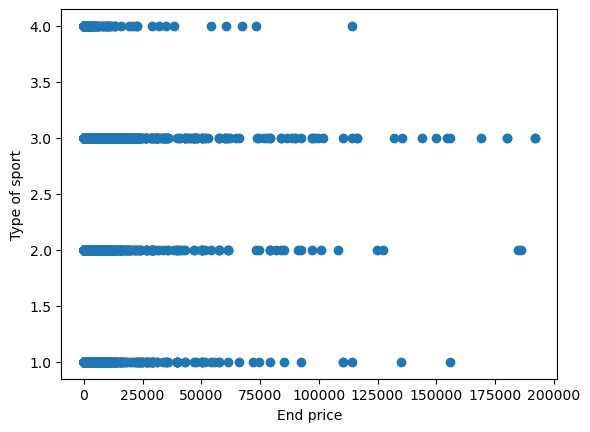

In [2222]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(full_data_cln.price_cln, full_data_cln.cat)
plt.xlabel('End price')
plt.ylabel('Type of sport')
plt.show()

We can see that most expensive are in category no.3 that is Basketball, maybe most expensive cards belong to basketball

Let's try to summarize the findings and conclude from this

We found that:
<ul>
    <li>The signed cards are expensive than average</li>
    <li>BGS (is also called as 'Beckett') - grading company that by their checking makes card more expensive</li>
    <li>Cards with Viny, Platinum, Black and Gold colors are more expensive</li>
    <li>'National Treasures' and 'Flawless' cards are more expensive</li>
    <li>It's diffiault to say who is the player that makes card more expensive but if the player is on top of best players of all time, it could be more expensive</li>
    <li>'MINT' or 'MT' Card conditions should to be importent part of making card more expensive but not in baseball</li>
    <li>Trading cards manufacturing companies 'Upper Deck' and 'SkyBox' make card more expensive but I'll check also Panini because it is very populary</li>
    <li>Basketball cards should be more expensive</li>
    </ul>

<h1>Learning Machine</h1>

Now I need to ask myself, "What does 'more expensive' card mean?", I think it's good idea to divide the list of prices to two groups by the ratio of 20:80, in other words, in the group of 20%, cards are expensive and in another group, cards are not expensive, so I asked myself where is the limit between those both groups, maybe 1500$ is the limit? Let's check 

In [2223]:
limit = 1500
less_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']<=limit]['price_cln'].count() /full_data_cln['price_cln'].count())
more_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']>limit]['price_cln'].count() /full_data_cln['price_cln'].count())
print('The limit is {}'.format(limit))
print('Cards which less from {}$: '.format(limit) ,less_from_limit)
print('Cards which more than {}$: '.format(limit) ,more_from_limit)


The limit is 1500
Cards which less from 1500$:  90.74%
Cards which more than 1500$:  9.26%


Nope! I need lower limit, maybe 500$?

In [2224]:
limit = 500
less_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']<=limit]['price_cln'].count() /full_data_cln['price_cln'].count())
more_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']>limit]['price_cln'].count() /full_data_cln['price_cln'].count())
print('The limit is {}'.format(limit))
print('Cards which less from {}$: '.format(limit) ,less_from_limit)
print('Cards which more than {}$: '.format(limit) ,more_from_limit)


The limit is 500
Cards which less from 500$:  83.78%
Cards which more than 500$:  16.22%


No...maybe 330$?

In [2225]:
limit = 330
less_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']<=limit]['price_cln'].count() /full_data_cln['price_cln'].count())
more_from_limit = "{:2.2%}".format(full_data_cln[full_data_cln['price_cln']>limit]['price_cln'].count() /full_data_cln['price_cln'].count())
print('The limit is {}'.format(limit))
print('Cards which less from {}$: '.format(limit) ,less_from_limit)
print('Cards which more than {}$: '.format(limit) ,more_from_limit)


The limit is 330
Cards which less from 330$:  80.00%
Cards which more than 330$:  20.00%


Yeahhh! I found the limit which is 330$

Let's add new column if the card is expensive or not (less or more limit of 330$)

In [2226]:
full_data_cln.reset_index(drop=True, inplace=True)

full_data_cln['expensive'] = 0
for i in range(len(full_data_cln)):
    if(full_data_cln.at[i,'price_cln']>limit):
        full_data_cln.at[i, 'expensive']=1

In [2227]:
full_data_cln['expensive'].value_counts()

0    19254
1     4813
Name: expensive, dtype: int64

Great! Like I wanted, we have the ratio of 20:80, full_data_cln['expensive'] will be target at learning machine

I need also to create some columns that are union of 'BGS', 'Beckett', 'Signed', 'National Treasures', etc...

<h5>Union of Signed columns</h5>

In [2228]:
signed = ['Autograph', 'Autographs', 'Signatures', 'Signed']
features_signed = []
for s in signed:
    for i in ['_football', '_baseball', '_basketball', '_hockey']:
        features_signed.append(s+""+i)


In [2229]:
full_data_cln['signed_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0;
    for feature in features_signed:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'signed_learning']=s

In [2230]:
full_data_cln['signed_learning'].value_counts()

0    18427
1     5640
Name: signed_learning, dtype: int64

<h5>Union of BGS and Beckett columns</h5>

In [2231]:
grading_companies = ['BGS','Beckett']
features_grading = []
for s in grading_companies:
    for i in ['_football', '_baseball', '_basketball', '_hockey']:
        features_grading.append(s+""+i)


In [2232]:
full_data_cln['grading_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0;
    for feature in features_grading:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'grading_learning']=s

In [2233]:
full_data_cln['grading_learning'].value_counts()

0    21738
1     2329
Name: grading_learning, dtype: int64

In [2234]:
#ccc = full_data_cln[full_data_cln['grading_learning']==1]
#ccc[['BGS_football', 'BGS_baseball', 'BGS_basketball', 'BGS_hockey', 'Beckett_football', 'Beckett_baseball', 'Beckett_basketball', 'Beckett_hockey']].tail(1800).head(25)

<h5>Union of Viny and Platinum columns</h5>

In [2235]:
full_data_cln['viny_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['Viny_football', 'Viny_baseball', 'Viny_basketball', 'Viny_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'viny_learning']=s

In [2236]:
full_data_cln['viny_learning'].value_counts()

0    24028
1       39
Name: viny_learning, dtype: int64

In [2237]:
full_data_cln['platinum_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['Platinum_football', 'Platinum_baseball', 'Platinum_basketball', 'Platinum_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'platinum_learning']=s

In [2238]:
full_data_cln['platinum_learning'].value_counts()

0    23761
1      306
Name: platinum_learning, dtype: int64

<h5>Union of 'National Treasures' and 'Flawless' columns</h5>

In [2239]:
full_data_cln['national_treasures_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['National Treasures_football', 'National Treasures_baseball', 'National Treasures_basketball', 'National Treasures_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'national_treasures_learning']=s

In [2240]:
full_data_cln['national_treasures_learning'].value_counts()

0    23541
1      526
Name: national_treasures_learning, dtype: int64

In [2241]:
full_data_cln['flawless_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['Flawless_football', 'Flawless_baseball', 'Flawless_basketball', 'Flawless_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'flawless_learning']=s

In [2242]:
full_data_cln['flawless_learning'].value_counts()

0    23793
1      274
Name: flawless_learning, dtype: int64

In [2243]:
card_conditions = ['MINT','MT']
features_condition = []
for s in card_conditions:
    for i in ['_football', '_baseball', '_basketball', '_hockey']:
        features_condition.append(s+""+i)


In [2244]:
full_data_cln['condition_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0;
    for feature in features_condition:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'condition_learning']=s

In [2245]:
full_data_cln['condition_learning'].value_counts()

1    20504
0     3563
Name: condition_learning, dtype: int64

In [2246]:
full_data_cln['upper_deck_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['Upper Deck_football', 'Upper Deck_baseball', 'Upper Deck_basketball', 'Upper Deck_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'upper_deck_learning']=s

In [2247]:
full_data_cln['upper_deck_learning'].value_counts()

0    21238
1     2829
Name: upper_deck_learning, dtype: int64

In [2248]:
full_data_cln['skybox_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['SkyBox_football', 'SkyBox_baseball', 'SkyBox_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'skybox_learning']=s

In [2249]:
full_data_cln['skybox_learning'].value_counts()

0    23925
1      142
Name: skybox_learning, dtype: int64

In [2250]:
full_data_cln['panini_learning'] = 0
for i in range(len(full_data_cln)):
    s = 0
    for feature in ['Panini_football', 'Panini_baseball', 'Panini_hockey']:
        s = s|full_data_cln.at[i,feature]
    full_data_cln.at[i,'panini_learning']=s

In [2251]:
full_data_cln['panini_learning'].value_counts()

0    20654
1     3413
Name: panini_learning, dtype: int64

Let's use model of Decision Trees because most columns are binary and this model is effiecial

In [2252]:
FEATURES_TRAIN = ['signed_learning','grading_learning','viny_learning','platinum_learning','national_treasures_learning','flawless_learning','condition_learning','upper_deck_learning','skybox_learning','panini_learning']
FEATURE_TARGER = 'expensive'
X_train, X_test, y_train, y_test = train_test_split(full_data_cln[FEATURES_TRAIN].values, full_data_cln[FEATURE_TARGER].values, random_state=1, test_size=0.5)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)
y_pred_train = decisionTree.predict(X_test)

In [2253]:
y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = decisionTree.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.8186653369899444
Accuracy on test data=  0.8196775801894632


Nice! maybe we can improve the accuracy if we add more columns that are non-binary like bids, year or categories (type of sport)? Let's try...

In [2254]:
FEATURES_TRAIN = ['cat','bids','year','signed_learning','grading_learning','viny_learning','platinum_learning','national_treasures_learning','flawless_learning','condition_learning','upper_deck_learning','skybox_learning','panini_learning']
FEATURE_TARGER = 'expensive'
X_train, X_test, y_train, y_test = train_test_split(full_data_cln[FEATURES_TRAIN].values, full_data_cln[FEATURE_TARGER].values, random_state=1, test_size=0.5)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)
y_pred_train = decisionTree.predict(X_test)

In [2255]:
y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = decisionTree.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.9732402559627691
Accuracy on test data=  0.8770151238158551


Ohh! We have better results! Let's check this with accuracy, percision, recall and 1f score

In [2256]:
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Precision score: ",metrics.precision_score(y_test, y_pred))
print("Recall score: ",metrics.recall_score(y_test, y_pred))
print("F1 score: ",metrics.f1_score(y_test, y_pred))

Accuracy score:  0.8770151238158551
Precision score:  0.7029384756657484
Recall score:  0.6476311336717429
F1 score:  0.6741523557904007


Okay, the results are not the best but those results are enough good

<h2>Summary</h2>

I took four dataframes whick each dataframe is type of sport (football, baseball, basketball and hockey), I gave each sport number of category so:
<ol>
    <li>football</li>
     <li>baseball</li>
     <li>basketball</li>
     <li>hockey</li>
    </ol>
and union those dataframes to one dataframe.
I did content analysis on titles by using of CountVectorizer, I got 100 the most common words in titles, I divided them manually to some categories like names of players, grading companies, types of packs, etc..and I searched on Google what are another names for those categories like Babe Ruth (name of baseball player who not showed in the list of 100 common words) or Upper Deck (name of manufacturing company) so I could to find what are details that make card more expensive by using of EDA.

I divided list of end prices to two groups and defined them "expensive" and "not expensive", what was the limit of price what divided them? I used in dividing of 20:80 so group of 20 is expesive and another group is not expensive, I found that the limit is 330$

After this, I begined with learning machine, I decided to use in Decision Trees because most features (columns) are binary and it's easy to arrive results by using of those features.

I got good results from Decision trees model but precision, recall and f1 scores are not the best, they enough good.

I decided not use in content analysis on description because most of them are without data or irrelevant information, which focuses on a sentimental description of cards.

I really enjoyed doing the project, I learned a lot! Thanks
